<center>
    
    COMP4240/5435 - Reinforcement Learning
    
# Homework 6 - On-policy Control with Approximation

    
</center>

Student Name: ______________________ 

**General Notes:**
- Questions marked with * are optional for COMP4240 - Undergraduate section. Questions marked as extra credit are optional for everyone. 
- Do not use a mix of python lists and numpy arrays. Every vector or matrix in your code should be a numpy array. 
- For functions that exist in both the python core and the numpy library, use the one in the numpy library. For example, use `np.max` instead of `max`. Another example: use `np.random.normal` instead of `random.gauss`.
- Make sure all of your plots have a proper size and include `xlabel`, `ylabel`, `legend`, `title`, and `grid`.

The purpose of this project is to study different properties of Function Approximation with on-policy control methods.  

In [1]:
# You are allowed to use the following modules
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym

## Task description
Consider the task of driving an underpowered car up a steep mountain road, as suggested by the diagram in the upper left of the following figure. The difficulty is that gravity is stronger than the car's engine, and even at full throttle the car cannot accelerate up the steep slope. The only solution is to first move away from the goal and up the opposite slope on the left. Then by applying full throttle the car can build up enough inertia to carry it up the steep slope even though it is slowing down the whole way.


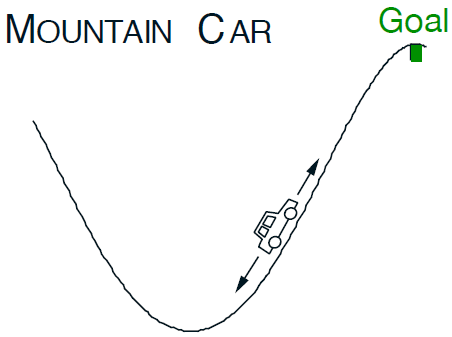


This is a continuous control task where things have to get worse in a sense (farther from the goal) before they can get better. 

**Observation space**

The observation is two dimensional including the position of the car along the x-axis and velocity of the car.

**Action space**

There are three deterministic actions: 0 accelerate to the left, 1 do nothing, and 2 accelerate to the right.

**Transition dynamics**

The car moves according to a simplified physics. Its position $x_t$ and velocity $\dot{x}_t$ are updated by

$x_{t+1} \doteq \text{bound}[x_t + \dot{x}_{t+1}]$

$\dot{x}_{t+1} \doteq \text{bound}[\dot{x}_t + 0.001 (A_t-1) - 0.0025 \cos(3x_t)]$


where the \textit{bound} operation enforces $-1.2 \le x_{t+1} \le 0.6$ and $-0.07 \le \dot{x}_{t+1} \le 0.07$. In addition, when $x_{t+1}$ reached the left bound, $\dot{x}_{t+1}$ was reset to zero. When it reached the right bound, the goal was reached and the episode was terminated. 

**Reward**

The reward in this problem is -1 on all time steps until the car moves past its goal position at the top of the mountain, which ends the episode. 

**Initial State**

Each episode starts from a random position $x_t \in [-0.6, -0.4)$ and zero velocity.

**Goal and Termination**

The episode terminates when the position of the car is greater than or equal to 0.5 (the goal position on top of the right hill).

**Arguments**

> env = gym.make('MountainCar-v0')

**Note**

Do not use the Continuous Mountain Car environment for this homework.
> gym.make('MountainCarContinuous-v0')


## Part I (4 points)

Check and confirm that the given Mountain Car simulation works as expected. Make sure you can observe and log (if needed) all the observations, actions, rewards, and termination conditions. You can animate the simulation by adding `render_mode='human'` when calling the `gym.make` class.  


In [2]:
#--- Your code here ---
import gym

# Initialize the Mountain Car environment
env = gym.make('MountainCar-v0', render_mode='human')

# Reset the environment to get the initial state
state = env.reset()
done = False
step = 0

print("Starting Mountain Car Simulation...\n")

# Run the environment step-by-step
while not done:
    # Choose a random action (for testing, we’ll select randomly)
    action = env.action_space.sample()

    # Apply the action to the environment
    next_state,_, reward, done, info = env.step(action)

    # Log the details
    print(f"Step: {step}")
    print(f"Current Position: {state[0]}, Current Velocity: {state[1]}")
    print(f"Action Taken: {action}")
    print(f"Next Position: {next_state[0]}, Next Velocity: {next_state[1]}")
    print(f"Reward: {reward}, Done: {done}\n")

    # Update the state
    state = next_state
    step += 1

# Close the environment once done
env.close()
print("Simulation completed.")

Starting Mountain Car Simulation...

Step: 0
Current Position: [-0.5294574  0.       ], Current Velocity: {}
Action Taken: 1
Next Position: -0.5294134616851807, Next Velocity: 4.393725612317212e-05
Reward: False, Done: False

Step: 1
Current Position: -0.5294134616851807, Current Velocity: 4.393725612317212e-05
Action Taken: 1
Next Position: -0.5293259024620056, Next Velocity: 8.754503505770117e-05
Reward: False, Done: False

Step: 2
Current Position: -0.5293259024620056, Current Velocity: 8.754503505770117e-05
Action Taken: 1
Next Position: -0.5291954278945923, Next Velocity: 0.0001304963225265965
Reward: False, Done: False

Step: 3
Current Position: -0.5291954278945923, Current Velocity: 0.0001304963225265965
Action Taken: 0
Next Position: -0.530022919178009, Next Velocity: -0.000827530981041491
Reward: False, Done: False

Step: 4
Current Position: -0.530022919178009, Current Velocity: -0.000827530981041491
Action Taken: 1
Next Position: -0.530802309513092, Next Velocity: -0.00077935

c:\Python310\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Step: 5
Current Position: -0.530802309513092, Current Velocity: -0.0007793527911417186
Action Taken: 1
Next Position: -0.5315276384353638, Next Velocity: -0.0007253306685015559
Reward: False, Done: False

Step: 6
Current Position: -0.5315276384353638, Current Velocity: -0.0007253306685015559
Action Taken: 2
Next Position: -0.5311934947967529, Next Velocity: 0.00033412998891435564
Reward: False, Done: False

Step: 7
Current Position: -0.5311934947967529, Current Velocity: 0.00033412998891435564
Action Taken: 1
Next Position: -0.5308023691177368, Next Velocity: 0.0003910853702109307
Reward: False, Done: False

Step: 8
Current Position: -0.5308023691177368, Current Velocity: 0.0003910853702109307
Action Taken: 1
Next Position: -0.530357301235199, Next Velocity: 0.00044510833686217666
Reward: False, Done: False

Step: 9
Current Position: -0.530357301235199, Current Velocity: 0.00044510833686217666
Action Taken: 0
Next Position: -0.530861496925354, Next Velocity: -0.0005042062839493155
Rewa

## Part II (6 points)

In this part, you will practice writing code for approximating the state value function. 

(a) write a function that generates Fourier basis features for a problem with one continuous state (1D state). The output of this function should be a vector of Fourier basis functions,
$X(s) = [\cos(0 * \pi * s), ..., \cos(n * \pi * s)]$ where $n$ represents the approximation order.

(b) Write a function that given a state $S$ and a weight vector $w$ calculates $V(S, w)$ by multiplying $w$ and $X(S)$. Make sure this is a vector-vector multiplication (dot product in this case) and avoid using for loops. Test your function with different values of $w$ and $S$. 

(c) Does $S$ need to be bounded? If yes, how would you do that? Write a function that given state in its original range returns bounded state.




In [3]:
# part II.a --- Your code here ---
def generate_Fourier_features(s,n):
    coefficients = np.arange(n+1)

    features = np.cos(coefficients * np.pi * s)
    return features


In [4]:
# part II.b --- Your code here ---
def get_state_value(s, w, B):
    # B is the vector of basis functions

    features = generate_Fourier_features(s,B)

    value = np.dot(w,features)

    return value

In [5]:
# part II.c --- Your answer here ---
def bound(s, min_val=-1.2, max_val=0.6):
    return (s-min_val) / (max_val - min_val)

## Part III (40 points)

Implement the **Episodic Semi-gradient SARSA** (pp. 244).

Episode 10, Steps: 180, Total Reward: -180.0
Episode 20, Steps: 171, Total Reward: -171.0
Episode 30, Steps: 151, Total Reward: -151.0
Episode 40, Steps: 170, Total Reward: -170.0
Episode 50, Steps: 137, Total Reward: -137.0
Episode 60, Steps: 175, Total Reward: -175.0
Episode 70, Steps: 145, Total Reward: -145.0
Episode 80, Steps: 284, Total Reward: -284.0
Episode 90, Steps: 118, Total Reward: -118.0
Episode 100, Steps: 188, Total Reward: -188.0
Episode 110, Steps: 127, Total Reward: -127.0
Episode 120, Steps: 122, Total Reward: -122.0
Episode 130, Steps: 199, Total Reward: -199.0
Episode 140, Steps: 112, Total Reward: -112.0
Episode 150, Steps: 155, Total Reward: -155.0
Episode 160, Steps: 115, Total Reward: -115.0
Episode 170, Steps: 149, Total Reward: -149.0
Episode 180, Steps: 190, Total Reward: -190.0
Episode 190, Steps: 191, Total Reward: -191.0
Episode 200, Steps: 204, Total Reward: -204.0
Episode 210, Steps: 157, Total Reward: -157.0
Episode 220, Steps: 192, Total Reward: -192

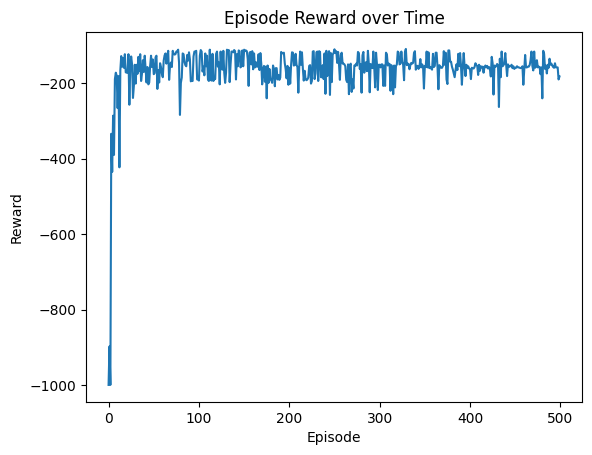

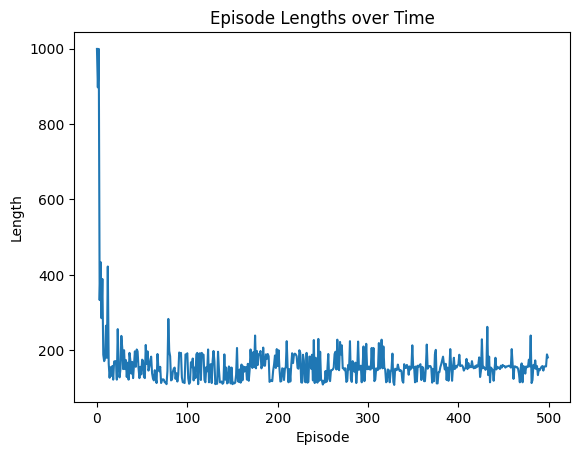

In [ ]:
import matplotlib.pyplot as plt
import gym
import numpy as np


class SemiGradientSARSA:
    """
    Semi-Gradient SARSA Agent with Fourier Basis for Continuous State Spaces.
    """

    def __init__(self, env, num_basis=8, learning_rate=0.01, gamma=1.0, epsilon=0.1):
        """
        Initialize the Semi-Gradient SARSA agent.

        Args:
            env (gym.Env): The environment for the agent.
            num_basis (int): The number of Fourier basis terms.
            learning_rate (float): Learning rate for weight updates.
            gamma (float): Discount factor for future rewards.
            epsilon (float): Epsilon for epsilon-greedy exploration.
        """
        self.env = env
        self.num_basis = num_basis
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon
        self.num_actions = env.action_space.n
        self.weights = np.zeros(((self.num_basis + 1) * 2, self.num_actions))

    def bound(self, s, min_val, max_val):
        """
        Normalize a value to the range [0, 1].

        Args:
            s (float): Value to be normalized.
            min_val (float): Minimum possible value.
            max_val (float): Maximum possible value.

        Returns:
            float: Normalized value.
        """
        return (s - min_val) / (max_val - min_val)

    def generate_Fourier_features(self, s, n):
        """
        Generate Fourier basis features.

        Args:
            s (float): State value to generate features for.
            n (int): Number of Fourier terms.

        Returns:
            np.array: Fourier basis features.
        """
        coefficients = np.arange(n + 1)
        return np.cos(coefficients * np.pi * s)

    def get_features(self, state):
        """
        Generate Fourier basis features for the state.

        Args:
            state (tuple): The state (position, velocity).

        Returns:
            np.array: Concatenated Fourier features for position and velocity.
        """
        position, velocity = state
        bounded_position = self.bound(position, -1.2, 0.6)
        bounded_velocity = self.bound(velocity, -0.07, 0.07)
        position_features = self.generate_Fourier_features(
            bounded_position, self.num_basis)
        velocity_features = self.generate_Fourier_features(
            bounded_velocity, self.num_basis)
        return np.concatenate([position_features, velocity_features])

    def get_q_value(self, state, action):
        """
        Get the Q-value for a given state-action pair.

        Args:
            state (tuple): The state.
            action (int): The action.

        Returns:
            float: Q-value.
        """
        features = self.get_features(state)
        return np.dot(self.weights[:, action], features)

    def get_action(self, state):
        """
        Choose an action using an epsilon-greedy policy.

        Args:
            state (tuple): The current state.

        Returns:
            int: Selected action.
        """
        if np.random.random() < self.epsilon:
            return self.env.action_space.sample()
        else:
            q_values = [self.get_q_value(state, a)
                        for a in range(self.num_actions)]
            return np.argmax(q_values)

    def update(self, state, action, reward, next_state, next_action, done):
        """
        Update weights using the semi-gradient SARSA update rule.
        """
        features = self.get_features(state)
        current_q = self.get_q_value(state, action)
        target = reward + \
            (self.gamma * self.get_q_value(next_state, next_action) if not done else 0)
        td_error = target - current_q
        self.weights[:, action] += self.learning_rate * td_error * features

    def train(self, num_episodes, max_steps=1000):
        """
        Train the agent using Episodic Semi-Gradient SARSA.

        Args:
            num_episodes (int): Number of episodes to train for.
            max_steps (int): Maximum steps per episode.

        Returns:
            tuple: Lists of episode rewards and episode steps.
        """
        episode_rewards = []
        episode_steps = []

        for episode in range(num_episodes):
            state, _ = self.env.reset()
            action = self.get_action(state)
            total_reward, steps = 0, 0

            for _ in range(max_steps):
                next_state, reward, done, _, _ = self.env.step(action)
                next_action = self.get_action(next_state) if not done else None
                self.update(state, action, reward,
                            next_state, next_action, done)
                state, action = next_state, next_action
                total_reward += reward
                steps += 1
                if done:
                    break

            episode_rewards.append(total_reward)
            episode_steps.append(steps)

            # Log every 10 episodes
            if (episode + 1) % 10 == 0:
                print(
                    f"Episode {episode + 1}: Steps = {steps}, Total Reward = {total_reward}")

        return episode_rewards, episode_steps


# Main Script
if __name__ == "__main__":
    ENV_NAME = 'MountainCar-v0'
    NUM_EPISODES = 500
    PARAMS = {
        'num_basis': 8,
        'learning_rate': 0.01,
        'gamma': 1.0,
        'epsilon': 0.1
    }

    env = gym.make(ENV_NAME)
    agent = SemiGradientSARSA(env, **PARAMS)

    # Train the agent
    episode_rewards, episode_steps = agent.train(NUM_EPISODES)

    # Plot Episode Rewards
    plt.figure()
    plt.plot(episode_rewards, label="Episode Rewards")
    plt.title("Episode Rewards Over Time")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Episode Steps
    plt.figure()
    plt.plot(episode_steps, label="Episode Steps")
    plt.title("Episode Steps Over Time")
    plt.xlabel("Episode")
    plt.ylabel("Steps")
    plt.legend()
    plt.grid()
    plt.show()

    env.close()


## Part IV (50 points) 

(a) Use the algorithm to learn the Mountain Car task. Tune the step-size parameter ($\alpha$), select a proper Function Approximation order, discount factor ($\gamma$), exploration probability ($\varepsilon$). 


(b) Plot sum of reward-per-episode vs. number of episodes. This plot should be averaged over 50-100 runs.


(c) Plot step-per-episode (in log scale) vs. number of episodes. This plot should be averaged over 50-100 runs.

(d) Animate the last episode in a selected run. Does the approximated policy seem optimal? Why?

In [13]:
import matplotlib.pyplot as plt
import gym
import numpy as np


class SemiGradientSARSA:
    def __init__(self, env, num_basis=8, learning_rate=0.01, gamma=1.0, epsilon=0.1):
        self.env = env
        self.num_basis = num_basis
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon
        self.num_actions = env.action_space.n
        self.weights = np.zeros(((self.num_basis + 1) * 2, self.num_actions))

    def bound(self, s, min_val, max_val):
        return (s - min_val) / (max_val - min_val)

    def generate_Fourier_features(self, s, n):
        coefficients = np.arange(n + 1)
        return np.cos(coefficients * np.pi * s)

    def get_features(self, state):
        position, velocity = state
        bounded_position = self.bound(position, -1.2, 0.6)
        bounded_velocity = self.bound(velocity, -0.07, 0.07)
        position_features = self.generate_Fourier_features(
            bounded_position, self.num_basis)
        velocity_features = self.generate_Fourier_features(
            bounded_velocity, self.num_basis)
        return np.concatenate([position_features, velocity_features])

    def get_q_value(self, state, action):
        features = self.get_features(state)
        return np.dot(self.weights[:, action], features)

    def get_action(self, state):
        if np.random.random() < self.epsilon:
            return self.env.action_space.sample()
        else:
            q_values = [self.get_q_value(state, a)
                        for a in range(self.num_actions)]
            return np.argmax(q_values)

    def update(self, state, action, reward, next_state, next_action, done):
        features = self.get_features(state)
        current_q = self.get_q_value(state, action)
        target = reward + \
            (self.gamma * self.get_q_value(next_state, next_action) if not done else 0)
        td_error = target - current_q
        self.weights[:, action] += self.learning_rate * td_error * features

    def train(self, num_episodes, max_steps=1000):
        episode_rewards = []
        episode_steps = []
        for episode in range(num_episodes):
            state, _ = self.env.reset()
            action = self.get_action(state)
            total_reward, steps = 0, 0
            for step in range(max_steps):
                next_state, reward, done, _, _ = self.env.step(action)
                next_action = self.get_action(next_state) if not done else None
                self.update(state, action, reward,
                            next_state, next_action, done)
                state, action = next_state, next_action
                total_reward += reward
                steps += 1
                if done:
                    break
            episode_rewards.append(total_reward)
            episode_steps.append(steps)

            # Logging for every 100 episodes
            if (episode + 1) % 10 == 0:
                print(
                    f"Episode {episode + 1}, Steps: {step + 1}, Total Reward: {total_reward}")
                
        return episode_rewards, episode_steps


def average_runs(env_name, num_runs, num_episodes, params):
    avg_rewards = np.zeros(num_episodes)
    avg_steps = np.zeros(num_episodes)
    for _ in range(num_runs):
        env = gym.make(env_name)
        agent = SemiGradientSARSA(env, **params)
        episode_rewards, episode_steps = agent.train(num_episodes)
        avg_rewards += np.array(episode_rewards)
        avg_steps += np.array(episode_steps)
    avg_rewards /= num_runs
    avg_steps /= num_runs
    return avg_rewards, avg_steps


def plot_results(avg_rewards, avg_steps, num_episodes):
    # Plot sum of reward per episode
    plt.figure(figsize=(12, 6))
    plt.plot(range(num_episodes), avg_rewards, label='Average Reward')
    plt.title('Sum of Reward Per Episode')
    plt.xlabel('Episodes')
    plt.ylabel('Total Reward')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot steps per episode (log scale)
    plt.figure(figsize=(12, 6))
    plt.plot(range(num_episodes), np.log(avg_steps),
             label='Average Steps (Log Scale)')
    plt.title('Steps Per Episode (Log Scale)')
    plt.xlabel('Episodes')
    plt.ylabel('Log(Steps)')
    plt.legend()
    plt.grid()
    plt.show()


def animate_last_episode(env_name, params, num_episodes):
    env = gym.make(env_name, render_mode="human")
    env.metadata['render_fps']=0
    agent = SemiGradientSARSA(env, **params)
    agent.train(num_episodes - 1)  # Train for num_episodes - 1
    state, _ = env.reset()
    action = agent.get_action(state)
    done = False
    while not done:
        next_state, reward, done, _, _ = env.step(action)
        action = agent.get_action(next_state)
        env.render()
    env.close()


# Main Execution
if __name__ == "__main__":
    ENV_NAME = 'MountainCar-v0'
    NUM_RUNS = 10  # Averaged over 50 runs
    NUM_EPISODES = 1000
    PARAMS = {
        'num_basis': 8,
        'learning_rate': 0.01,
        'gamma': 1.0,
        'epsilon': 0.1
    }

    # Part (a) and (b): Train and plot average rewards and steps
    avg_rewards, avg_steps = average_runs(
        ENV_NAME, NUM_RUNS, NUM_EPISODES, PARAMS)
    plot_results(avg_rewards, avg_steps, NUM_EPISODES)

    # Part (d): Animate the last episode
    animate_last_episode(ENV_NAME, PARAMS, NUM_EPISODES)


Episode 10, Steps: 493, Total Reward: -493.0
Episode 20, Steps: 517, Total Reward: -517.0
Episode 30, Steps: 284, Total Reward: -284.0
Episode 40, Steps: 167, Total Reward: -167.0
Episode 50, Steps: 161, Total Reward: -161.0
Episode 60, Steps: 664, Total Reward: -664.0
Episode 70, Steps: 510, Total Reward: -510.0
Episode 80, Steps: 580, Total Reward: -580.0
Episode 90, Steps: 643, Total Reward: -643.0
Episode 100, Steps: 344, Total Reward: -344.0
Episode 110, Steps: 661, Total Reward: -661.0
Episode 120, Steps: 1000, Total Reward: -1000.0
Episode 130, Steps: 1000, Total Reward: -1000.0
Episode 140, Steps: 391, Total Reward: -391.0
Episode 150, Steps: 257, Total Reward: -257.0
Episode 160, Steps: 510, Total Reward: -510.0
Episode 170, Steps: 847, Total Reward: -847.0
Episode 180, Steps: 627, Total Reward: -627.0
Episode 190, Steps: 427, Total Reward: -427.0
Episode 200, Steps: 1000, Total Reward: -1000.0
Episode 210, Steps: 389, Total Reward: -389.0
Episode 220, Steps: 487, Total Reward

KeyboardInterrupt: 

## Part V (20 Extra Points)

(a) Implement the **Episodic Semi-gradient $n$-step SARSA** (pp. 247).

In [ ]:
# Your code here

Episode 10: Steps = 621, Total Reward = -618.0
Episode 20: Steps = 165, Total Reward = -162.0
Episode 30: Steps = 167, Total Reward = -164.0
Episode 40: Steps = 201, Total Reward = -198.0
Episode 50: Steps = 159, Total Reward = -156.0
Episode 60: Steps = 232, Total Reward = -229.0
Episode 70: Steps = 161, Total Reward = -158.0
Episode 80: Steps = 156, Total Reward = -153.0
Episode 90: Steps = 171, Total Reward = -168.0
Episode 100: Steps = 228, Total Reward = -225.0
Episode 110: Steps = 155, Total Reward = -152.0
Episode 120: Steps = 151, Total Reward = -148.0
Episode 130: Steps = 139, Total Reward = -136.0
Episode 140: Steps = 153, Total Reward = -150.0
Episode 150: Steps = 283, Total Reward = -280.0
Episode 160: Steps = 240, Total Reward = -237.0
Episode 170: Steps = 167, Total Reward = -164.0
Episode 180: Steps = 211, Total Reward = -208.0
Episode 190: Steps = 156, Total Reward = -153.0
Episode 200: Steps = 211, Total Reward = -208.0
Episode 210: Steps = 231, Total Reward = -228.0
E

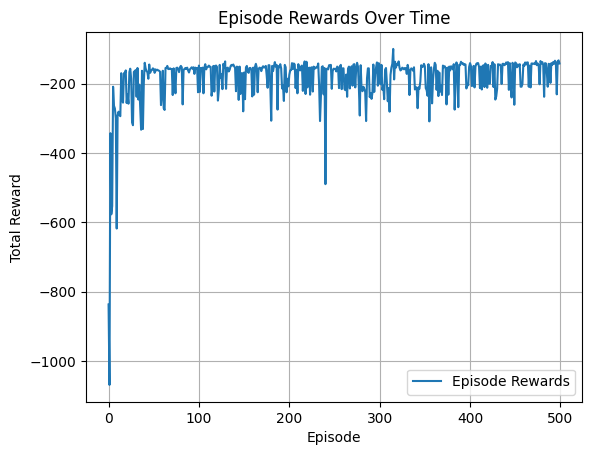

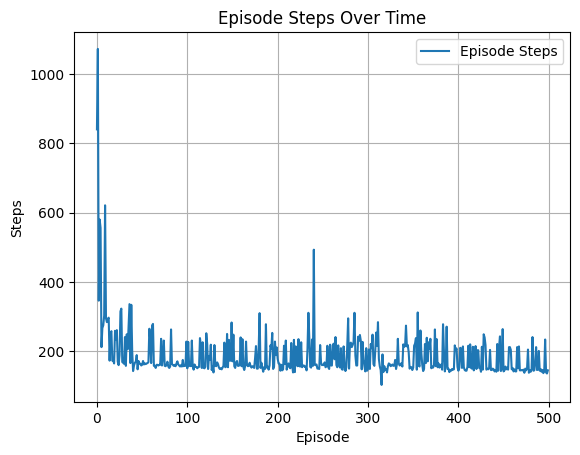

In [12]:
import gym
import numpy as np
import matplotlib.pyplot as plt


class EpisodicNStepSARSA:
    def __init__(self, env, num_basis=8, learning_rate=0.01, gamma=1.0, epsilon=0.1, n=4):
        """
        Initialize the Episodic Semi-Gradient n-Step SARSA agent.

        Args:
            env (gym.Env): The environment for the agent.
            num_basis (int): Number of Fourier basis terms.
            learning_rate (float): Learning rate for weight updates.
            gamma (float): Discount factor.
            epsilon (float): Epsilon for epsilon-greedy exploration.
            n (int): Number of steps for n-step SARSA.
        """
        self.env = env
        self.num_basis = num_basis
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon
        self.n = n

        self.num_actions = env.action_space.n
        self.weights = np.zeros(((self.num_basis + 1) * 2, self.num_actions))

    def bound(self, s, min_val, max_val):
        """
        Normalize a value to the range [0, 1].

        Args:
            s (float): Value to normalize.
            min_val (float): Minimum value.
            max_val (float): Maximum value.

        Returns:
            float: Normalized value.
        """
        return (s - min_val) / (max_val - min_val)

    def generate_Fourier_features(self, s, n):
        """
        Generate Fourier basis features.

        Args:
            s (float): State value to generate features for.
            n (int): Number of Fourier terms.

        Returns:
            np.array: Fourier basis features.
        """
        coefficients = np.arange(n + 1)
        return np.cos(coefficients * np.pi * s)

    def get_features(self, state):
        """
        Generate Fourier basis features for the state.

        Args:
            state (tuple): The state (position, velocity).

        Returns:
            np.array: Concatenated Fourier features for position and velocity.
        """
        position, velocity = state
        bounded_position = self.bound(position, -1.2, 0.6)
        bounded_velocity = self.bound(velocity, -0.07, 0.07)

        position_features = self.generate_Fourier_features(
            bounded_position, self.num_basis)
        velocity_features = self.generate_Fourier_features(
            bounded_velocity, self.num_basis)

        return np.concatenate([position_features, velocity_features])

    def get_q_value(self, state, action):
        """
        Get the Q-value for a given state-action pair.

        Args:
            state (tuple): The state.
            action (int): The action.

        Returns:
            float: Q-value.
        """
        features = self.get_features(state)
        return np.dot(self.weights[:, action], features)

    def get_action(self, state):
        """
        Choose an action using an epsilon-greedy policy.

        Args:
            state (tuple): The current state.

        Returns:
            int: Selected action.
        """
        if np.random.random() < self.epsilon:
            return self.env.action_space.sample()
        else:
            q_values = [self.get_q_value(state, a)
                        for a in range(self.num_actions)]
            return np.argmax(q_values)

    def update(self, trajectory, T, t):
        """
        Update weights using the n-step SARSA update rule.

        Args:
            trajectory (list): List of (state, action, reward) transitions.
            T (int): Time step when the episode ends.
            t (int): Current time step.
        """
        tau = t - self.n + 1
        if tau >= 0:
            G = 0
            for i in range(tau + 1, min(tau + self.n + 1, T + 1)):
                G += (self.gamma ** (i - tau - 1)) * \
                    trajectory[i][2]  # Sum of rewards
            if tau + self.n < T:
                G += (self.gamma ** self.n) * self.get_q_value(
                    trajectory[tau + self.n][0], trajectory[tau + self.n][1]
                )

            state, action = trajectory[tau][:2]
            features = self.get_features(state)
            td_error = G - self.get_q_value(state, action)
            self.weights[:, action] += self.learning_rate * td_error * features

    def train(self, num_episodes, max_steps=1000):
        """
        Train the agent using Episodic Semi-Gradient n-Step SARSA.

        Args:
            num_episodes (int): Number of episodes to train for.
            max_steps (int): Maximum steps per episode.

        Returns:
            tuple: Lists of episode rewards and episode steps.
        """
        episode_rewards = []
        episode_steps = []

        for episode in range(num_episodes):
            state, _ = self.env.reset()
            action = self.get_action(state)
            trajectory = [(state, action, 0)]
            total_reward, t = 0, 0
            T = float("inf")

            while True:
                if t < T:
                    next_state, reward, done, _, _ = self.env.step(action)
                    next_action = self.get_action(
                        next_state) if not done else None
                    trajectory.append((next_state, next_action, reward))
                    total_reward += reward
                    if done:
                        T = t + 1
                    state, action = next_state, next_action

                self.update(trajectory, T, t)
                t += 1
                if tau := t - self.n >= T - 1:
                    break

            episode_rewards.append(total_reward)
            episode_steps.append(t)

            # Log every 10 episodes
            if (episode + 1) % 10 == 0:
                print(
                    f"Episode {episode + 1}: Steps = {t}, Total Reward = {total_reward}")

        return episode_rewards, episode_steps


# Main Script
if __name__ == "__main__":
    ENV_NAME = 'MountainCar-v0'
    NUM_EPISODES = 500
    PARAMS = {
        'num_basis': 8,
        'learning_rate': 0.01,
        'gamma': 1.0,
        'epsilon': 0.1,
        'n': 4  # n-step SARSA
    }

    env = gym.make(ENV_NAME)
    agent = EpisodicNStepSARSA(env, **PARAMS)

    # Train the agent
    episode_rewards, episode_steps = agent.train(NUM_EPISODES)

    # Plot Episode Rewards
    plt.figure()
    plt.plot(episode_rewards, label="Episode Rewards")
    plt.title("Episode Rewards Over Time")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Episode Steps
    plt.figure()
    plt.plot(episode_steps, label="Episode Steps")
    plt.title("Episode Steps Over Time")
    plt.xlabel("Episode")
    plt.ylabel("Steps")
    plt.legend()
    plt.grid()
    plt.show()

    env.close()


(b) Use the algorithm to learn the Mountain Car task with $n \in \{1, 8, 16\}$. Tune the step-size parameter ($\alpha$), select a proper Function Approximation order, discount factor ($\gamma$), exploration probability ($\varepsilon$). Plot step-per-episode (in log scale) vs. number of episodes. This plot should be averaged over 50-100 runs.    

In [ ]:
# Your code here

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt


class EpisodicNStepSARSA:
    def __init__(self, env, num_basis=8, learning_rate=0.01, gamma=1.0, epsilon=0.1, n=4):
        self.env = env
        self.num_basis = num_basis
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon
        self.n = n
        self.num_actions = env.action_space.n
        self.weights = np.zeros(((self.num_basis + 1) * 2, self.num_actions))

    def bound(self, s, min_val, max_val):
        return (s - min_val) / (max_val - min_val)

    def generate_Fourier_features(self, s, n):
        coefficients = np.arange(n + 1)
        return np.cos(coefficients * np.pi * s)

    def get_features(self, state):
        position, velocity = state
        bounded_position = self.bound(position, -1.2, 0.6)
        bounded_velocity = self.bound(velocity, -0.07, 0.07)
        position_features = self.generate_Fourier_features(
            bounded_position, self.num_basis)
        velocity_features = self.generate_Fourier_features(
            bounded_velocity, self.num_basis)
        return np.concatenate([position_features, velocity_features])

    def get_q_value(self, state, action):
        features = self.get_features(state)
        return np.dot(self.weights[:, action], features)

    def get_action(self, state):
        if np.random.random() < self.epsilon:
            return self.env.action_space.sample()
        else:
            q_values = [self.get_q_value(state, a)
                        for a in range(self.num_actions)]
            return np.argmax(q_values)

    def update(self, trajectory, T, t):
        tau = t - self.n + 1
        if tau >= 0:
            G = 0
            for i in range(tau + 1, min(tau + self.n + 1, T + 1)):
                G += (self.gamma ** (i - tau - 1)) * trajectory[i][2]
            if tau + self.n < T:
                G += (self.gamma ** self.n) * self.get_q_value(
                    trajectory[tau + self.n][0], trajectory[tau + self.n][1]
                )

            state, action = trajectory[tau][:2]
            features = self.get_features(state)
            td_error = G - self.get_q_value(state, action)
            self.weights[:, action] += self.learning_rate * td_error * features

    def train(self, num_episodes, max_steps=1000):
        episode_steps = []

        for episode in range(num_episodes):
            state, _ = self.env.reset()
            action = self.get_action(state)
            trajectory = [(state, action, 0)]
            t, T = 0, float("inf")

            while True:
                if t < T:
                    next_state, reward, done, _, _ = self.env.step(action)
                    next_action = self.get_action(
                        next_state) if not done else None
                    trajectory.append((next_state, next_action, reward))
                    if done:
                        T = t + 1
                    state, action = next_state, next_action

                self.update(trajectory, T, t)
                t += 1
                if tau := t - self.n >= T - 1:
                    break

            episode_steps.append(t)

        return episode_steps


def average_runs(env_name, num_runs, num_episodes, params):
    """
    Perform multiple runs and average results for each n.
    """
    avg_steps = np.zeros(num_episodes)
    for _ in range(num_runs):
        env = gym.make(env_name)
        agent = EpisodicNStepSARSA(env, **params)
        episode_steps = agent.train(num_episodes)
        avg_steps += np.array(episode_steps)
    avg_steps /= num_runs
    return avg_steps


def plot_results(n_values, avg_steps_per_n, num_episodes):
    """
    Plot the steps per episode (log scale) vs. number of episodes for each n.
    """
    plt.figure(figsize=(12, 6))
    for n, avg_steps in zip(n_values, avg_steps_per_n):
        plt.plot(range(num_episodes), np.log(avg_steps), label=f'n = {n}')
    plt.title("Steps Per Episode (Log Scale) vs. Number of Episodes")
    plt.xlabel("Episodes")
    plt.ylabel("Log(Steps)")
    plt.legend()
    plt.grid()
    plt.show()


# Main Script
if __name__ == "__main__":
    ENV_NAME = 'MountainCar-v0'
    NUM_RUNS = 50  # Averaged over 50 runs
    NUM_EPISODES = 500
    N_VALUES = [1, 8, 16]
    PARAMS = {
        'num_basis': 8,
        'learning_rate': 0.01,
        'gamma': 1.0,
        'epsilon': 0.1
    }

    avg_steps_per_n = []
    for n in N_VALUES:
        print(f"Running for n = {n}...")
        params = PARAMS.copy()
        params['n'] = n
        avg_steps = average_runs(ENV_NAME, NUM_RUNS, NUM_EPISODES, params)
        avg_steps_per_n.append(avg_steps)

    # Plot the results
    plot_results(N_VALUES, avg_steps_per_n, NUM_EPISODES)


In [18]:
import gym
import numpy as np
import matplotlib.pyplot as plt


class EpisodicNStepSARSA:
    def __init__(self, env, num_basis=8, learning_rate=0.01, gamma=1.0, epsilon=0.1, n=4):
        """
        Initialize the Episodic Semi-Gradient n-Step SARSA agent.

        Args:
            env (gym.Env): The environment for the agent.
            num_basis (int): Number of Fourier basis terms.
            learning_rate (float): Learning rate for weight updates.
            gamma (float): Discount factor.
            epsilon (float): Epsilon for epsilon-greedy exploration.
            n (int): Number of steps for n-step SARSA.
        """
        self.env = env
        self.num_basis = num_basis
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon
        self.n = n

        self.num_actions = env.action_space.n
        self.weights = np.zeros(((self.num_basis + 1) * 2, self.num_actions))

    def bound(self, s, min_val, max_val):
        """
        Normalize a value to the range [0, 1].
        """
        return (s - min_val) / (max_val - min_val)

    def generate_Fourier_features(self, s, n):
        """
        Generate Fourier basis features.
        """
        coefficients = np.arange(n + 1)
        return np.cos(coefficients * np.pi * s)

    def get_features(self, state):
        """
        Generate Fourier basis features for the state.
        """
        position, velocity = state
        bounded_position = self.bound(position, -1.2, 0.6)
        bounded_velocity = self.bound(velocity, -0.07, 0.07)

        position_features = self.generate_Fourier_features(
            bounded_position, self.num_basis)
        velocity_features = self.generate_Fourier_features(
            bounded_velocity, self.num_basis)

        return np.concatenate([position_features, velocity_features])

    def get_q_value(self, state, action):
        """
        Get the Q-value for a given state-action pair.
        """
        features = self.get_features(state)
        return np.dot(self.weights[:, action], features)

    def get_action(self, state):
        """
        Choose an action using an epsilon-greedy policy.
        """
        if np.random.random() < self.epsilon:
            return self.env.action_space.sample()
        else:
            q_values = [self.get_q_value(state, a)
                        for a in range(self.num_actions)]
            return np.argmax(q_values)

    def update(self, trajectory, T, t):
        """
        Update weights using the n-step SARSA update rule.
        """
        tau = t - self.n + 1
        if tau >= 0:
            G = 0
            for i in range(tau + 1, min(tau + self.n + 1, T + 1)):
                G += (self.gamma ** (i - tau - 1)) * \
                    trajectory[i][2]  # Sum of rewards
            if tau + self.n < T:
                G += (self.gamma ** self.n) * self.get_q_value(
                    trajectory[tau + self.n][0], trajectory[tau + self.n][1]
                )

            state, action = trajectory[tau][:2]
            features = self.get_features(state)
            td_error = G - self.get_q_value(state, action)
            self.weights[:, action] += self.learning_rate * td_error * features

    def train(self, num_episodes, max_steps=1000):
        """
        Train the agent using Episodic Semi-Gradient n-Step SARSA.

        Returns:
            episode_steps: Steps per episode.
        """
        episode_steps = []
        reward_step = []

        for episode in range(num_episodes):
            state, _ = self.env.reset()
            action = self.get_action(state)
            trajectory = [(state, action, 0)]
            t, T = 0, float("inf")
            total_reward = 0
            while True:
                if t < T:
                    next_state, reward, done, _, _ = self.env.step(action)
                    total_reward+=reward
                    next_action = self.get_action(
                        next_state) if not done else None
                    trajectory.append((next_state, next_action, reward))
                    if done:
                        T = t + 1
                    state, action = next_state, next_action

                self.update(trajectory, T, t)
                t += 1
                if tau := t - self.n >= T - 1:
                    break

            episode_steps.append(t)
            reward_step.append(total_reward)

            # Log every 10 episodes
            if (episode + 1) % 10 == 0:
                print(f"Episode {episode + 1}: Steps = {t}: Reward step = {total_reward}")

        return episode_steps, reward_step


def average_runs(env_name, num_runs, num_episodes, params):
    """
    Perform multiple runs and average results for each n.
    """
    avg_steps = np.zeros(num_episodes)
    reward_step = np.zeros(num_episodes)
    for _ in range(num_runs):
        env = gym.make(env_name)
        agent = EpisodicNStepSARSA(env, **params)
        episode_steps, reward = agent.train(num_episodes)
        avg_steps += np.array(episode_steps)
        reward_step += np.array(reward)
    
    avg_steps /= num_runs
    reward_step /= num_runs

    return avg_steps, reward_step


def plot_results(n_values, avg_steps_per_n, num_episodes):
    """
    Plot the steps per episode (log scale) vs. number of episodes for each n.
    """
    plt.figure(figsize=(12, 6))
    for n, avg_steps in zip(n_values, avg_steps_per_n):
        plt.plot(range(num_episodes), np.log(avg_steps), label=f'n = {n}')
    plt.title("Steps Per Episode (Log Scale) vs. Number of Episodes")
    plt.xlabel("Episodes")
    plt.ylabel("Log(Steps)")
    plt.legend()
    plt.grid()
    plt.show()


# Main Script
if __name__ == "__main__":
    ENV_NAME = 'MountainCar-v0'
    NUM_RUNS = 50  # Averaged over 50 runs
    NUM_EPISODES = 1000
    N_VALUES = [1, 8, 16]
    PARAMS = {
        'num_basis': 8,
        'learning_rate': 0.01,
        'gamma': 1.0,
        'epsilon': 0.1
    }

    avg_steps_per_n = []
    avg_reward_per_n = []
    for n in N_VALUES:
        print(f"Running for n = {n}...")
        params = PARAMS.copy()
        params['n'] = n
        avg_steps, reward_step = average_runs(ENV_NAME, NUM_RUNS, NUM_EPISODES, params)
        avg_steps_per_n.append(avg_steps)
        avg_reward_per_n.append(reward_step)

    # Plot the results
    plot_results(N_VALUES, avg_steps_per_n, NUM_EPISODES)
    plot_results(N_VALUES, avg_reward_per_n, NUM_EPISODES)


Running for n = 1...
Episode 10: Steps = 690: Reward step = -690.0
Episode 20: Steps = 533: Reward step = -533.0
Episode 30: Steps = 267: Reward step = -267.0
Episode 40: Steps = 258: Reward step = -258.0
Episode 50: Steps = 366: Reward step = -366.0
Episode 60: Steps = 2004: Reward step = -2004.0
Episode 70: Steps = 702: Reward step = -702.0
Episode 80: Steps = 254: Reward step = -254.0
Episode 90: Steps = 391: Reward step = -391.0
Episode 100: Steps = 447: Reward step = -447.0
Episode 110: Steps = 334: Reward step = -334.0
Episode 120: Steps = 229: Reward step = -229.0
Episode 130: Steps = 687: Reward step = -687.0
Episode 140: Steps = 285: Reward step = -285.0
Episode 150: Steps = 218: Reward step = -218.0
Episode 160: Steps = 220: Reward step = -220.0
Episode 170: Steps = 325: Reward step = -325.0
Episode 180: Steps = 488: Reward step = -488.0
Episode 190: Steps = 302: Reward step = -302.0
Episode 200: Steps = 457: Reward step = -457.0
Episode 210: Steps = 218: Reward step = -218.0

KeyboardInterrupt: 

(c) Show an animation of the task for each $n$.

Running for n = 1...
Episode 10: Steps = 421, Total Reward = -421.0
Episode 20: Steps = 204, Total Reward = -204.0
Episode 30: Steps = 286, Total Reward = -286.0
Episode 40: Steps = 271, Total Reward = -271.0
Episode 50: Steps = 284, Total Reward = -284.0
Episode 60: Steps = 207, Total Reward = -207.0
Episode 70: Steps = 353, Total Reward = -353.0
Episode 80: Steps = 553, Total Reward = -553.0
Episode 90: Steps = 272, Total Reward = -272.0
Episode 100: Steps = 360, Total Reward = -360.0
Episode 110: Steps = 500, Total Reward = -500.0
Episode 120: Steps = 544, Total Reward = -544.0
Episode 130: Steps = 650, Total Reward = -650.0
Episode 140: Steps = 268, Total Reward = -268.0
Episode 150: Steps = 448, Total Reward = -448.0
Episode 160: Steps = 2125, Total Reward = -2125.0
Episode 170: Steps = 294, Total Reward = -294.0
Episode 180: Steps = 747, Total Reward = -747.0
Episode 190: Steps = 662, Total Reward = -662.0
Episode 200: Steps = 197, Total Reward = -197.0
Episode 210: Steps = 374, 

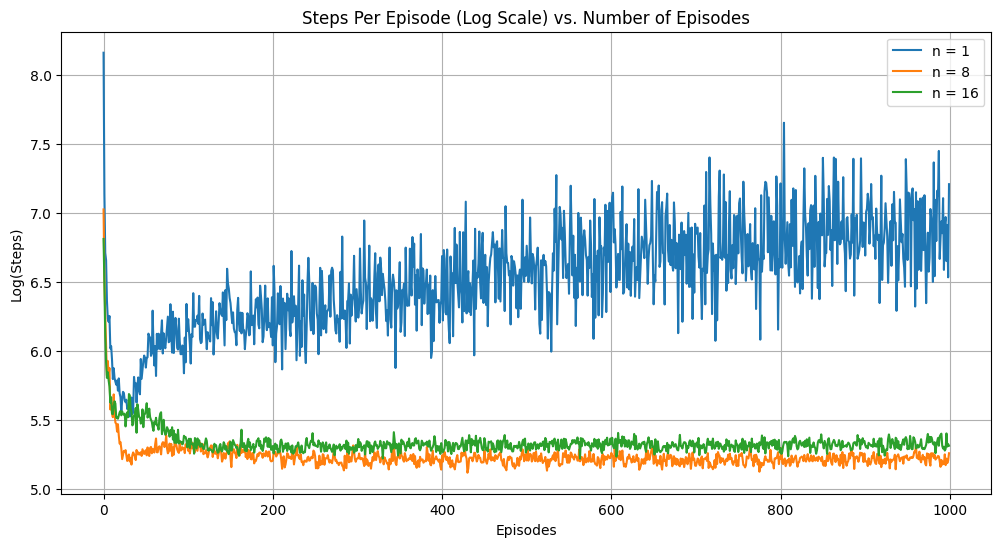

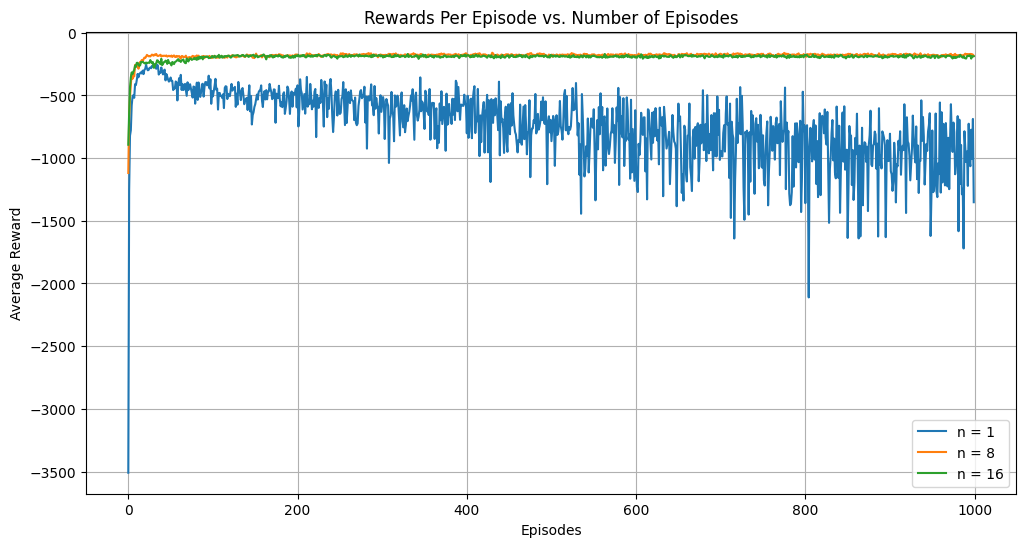

: 

In [20]:
import gym
import numpy as np
import matplotlib.pyplot as plt


class EpisodicNStepSARSA:
    def __init__(self, env, num_basis=8, learning_rate=0.01, gamma=1.0, epsilon=0.1, n=4):
        self.env = env
        self.num_basis = num_basis
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon
        self.n = n

        self.num_actions = env.action_space.n
        self.weights = np.zeros(((self.num_basis + 1) * 2, self.num_actions))

    def bound(self, s, min_val, max_val):
        return (s - min_val) / (max_val - min_val)

    def generate_Fourier_features(self, s, n):
        coefficients = np.arange(n + 1)
        return np.cos(coefficients * np.pi * s)

    def get_features(self, state):
        position, velocity = state
        bounded_position = self.bound(position, -1.2, 0.6)
        bounded_velocity = self.bound(velocity, -0.07, 0.07)

        position_features = self.generate_Fourier_features(
            bounded_position, self.num_basis)
        velocity_features = self.generate_Fourier_features(
            bounded_velocity, self.num_basis)

        return np.concatenate([position_features, velocity_features])

    def get_q_value(self, state, action):
        features = self.get_features(state)
        return np.dot(self.weights[:, action], features)

    def get_action(self, state):
        if np.random.random() < self.epsilon:
            return self.env.action_space.sample()
        else:
            q_values = [self.get_q_value(state, a)
                        for a in range(self.num_actions)]
            return np.argmax(q_values)

    def update(self, trajectory, T, t):
        tau = t - self.n + 1
        if tau >= 0:
            G = 0
            for i in range(tau + 1, min(tau + self.n + 1, T + 1)):
                G += (self.gamma ** (i - tau - 1)) * trajectory[i][2]
            if tau + self.n < T:
                G += (self.gamma ** self.n) * self.get_q_value(
                    trajectory[tau + self.n][0], trajectory[tau + self.n][1]
                )

            state, action = trajectory[tau][:2]
            features = self.get_features(state)
            td_error = G - self.get_q_value(state, action)
            self.weights[:, action] += self.learning_rate * td_error * features

    def train(self, num_episodes, max_steps=1000):
        episode_steps = []
        reward_per_episode = []

        for episode in range(num_episodes):
            state, _ = self.env.reset()
            action = self.get_action(state)
            trajectory = [(state, action, 0)]
            t, T = 0, float("inf")
            total_reward = 0

            while True:
                if t < T:
                    next_state, reward, done, _, _ = self.env.step(action)
                    total_reward += reward
                    next_action = self.get_action(
                        next_state) if not done else None
                    trajectory.append((next_state, next_action, reward))
                    if done:
                        T = t + 1
                    state, action = next_state, next_action

                self.update(trajectory, T, t)
                t += 1
                if tau := t - self.n >= T - 1:
                    break

            episode_steps.append(t)
            reward_per_episode.append(total_reward)

            if (episode + 1) % 10 == 0:
                print(
                    f"Episode {episode + 1}: Steps = {t}, Total Reward = {total_reward}")

        return episode_steps, reward_per_episode


def average_runs(env_name, num_runs, num_episodes, params):
    avg_steps = np.zeros(num_episodes)
    avg_rewards = np.zeros(num_episodes)

    for _ in range(num_runs):
        env = gym.make(env_name)
        agent = EpisodicNStepSARSA(env, **params)
        episode_steps, reward_per_episode = agent.train(num_episodes)
        avg_steps += np.array(episode_steps)
        avg_rewards += np.array(reward_per_episode)

    avg_steps /= num_runs
    avg_rewards /= num_runs

    return avg_steps, avg_rewards


def plot_steps_per_episode(n_values, avg_steps_per_n, num_episodes):
    plt.figure(figsize=(12, 6))
    for n, avg_steps in zip(n_values, avg_steps_per_n):
        plt.plot(range(num_episodes), np.log(avg_steps), label=f'n = {n}')
    plt.title("Steps Per Episode (Log Scale) vs. Number of Episodes")
    plt.xlabel("Episodes")
    plt.ylabel("Log(Steps)")
    plt.legend()
    plt.grid()
    plt.show()


def plot_rewards_per_episode(n_values, avg_rewards_per_n, num_episodes):
    plt.figure(figsize=(12, 6))
    for n, avg_rewards in zip(n_values, avg_rewards_per_n):
        plt.plot(range(num_episodes), avg_rewards, label=f'n = {n}')
    plt.title("Rewards Per Episode vs. Number of Episodes")
    plt.xlabel("Episodes")
    plt.ylabel("Average Reward")
    plt.legend()
    plt.grid()
    plt.show()


# Main Script
if __name__ == "__main__":
    ENV_NAME = 'MountainCar-v0'
    NUM_RUNS = 50
    NUM_EPISODES = 1000
    N_VALUES = [1, 8, 16]
    PARAMS = {
        'num_basis': 8,
        'learning_rate': 0.01,
        'gamma': 1.0,
        'epsilon': 0.1
    }

    avg_steps_per_n = []
    avg_rewards_per_n = []

    for n in N_VALUES:
        print(f"Running for n = {n}...")
        params = PARAMS.copy()
        params['n'] = n
        avg_steps, avg_rewards = average_runs(
            ENV_NAME, NUM_RUNS, NUM_EPISODES, params)
        avg_steps_per_n.append(avg_steps)
        avg_rewards_per_n.append(avg_rewards)

    # Plot the results
    plot_steps_per_episode(N_VALUES, avg_steps_per_n, NUM_EPISODES)
    plot_rewards_per_episode(N_VALUES, avg_rewards_per_n, NUM_EPISODES)


In [ ]:
# Your code here

Running for n = 1...
Run 1/10...
Episode 10: Steps = 487, Total Reward = -487.0
Episode 20: Steps = 351, Total Reward = -351.0
Episode 30: Steps = 237, Total Reward = -237.0
Episode 40: Steps = 273, Total Reward = -273.0
Episode 50: Steps = 340, Total Reward = -340.0
Episode 60: Steps = 204, Total Reward = -204.0
Episode 70: Steps = 917, Total Reward = -917.0
Episode 80: Steps = 567, Total Reward = -567.0
Episode 90: Steps = 1267, Total Reward = -1267.0
Episode 100: Steps = 4735, Total Reward = -4735.0
Run 2/10...
Episode 10: Steps = 423, Total Reward = -423.0
Episode 20: Steps = 342, Total Reward = -342.0
Episode 30: Steps = 229, Total Reward = -229.0
Episode 40: Steps = 453, Total Reward = -453.0
Episode 50: Steps = 350, Total Reward = -350.0
Episode 60: Steps = 481, Total Reward = -481.0
Episode 70: Steps = 256, Total Reward = -256.0
Episode 80: Steps = 424, Total Reward = -424.0
Episode 90: Steps = 1256, Total Reward = -1256.0
Episode 100: Steps = 275, Total Reward = -275.0
Run 3/1

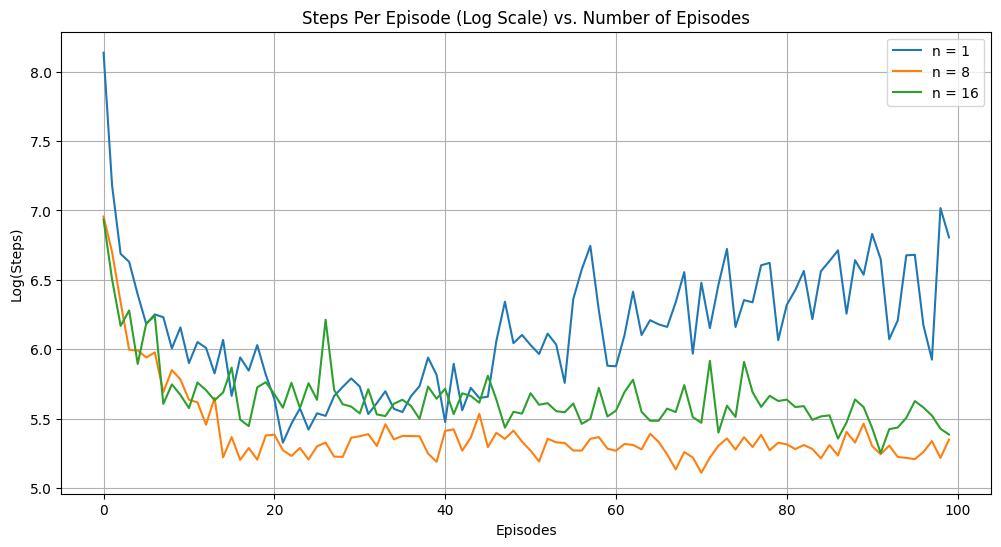

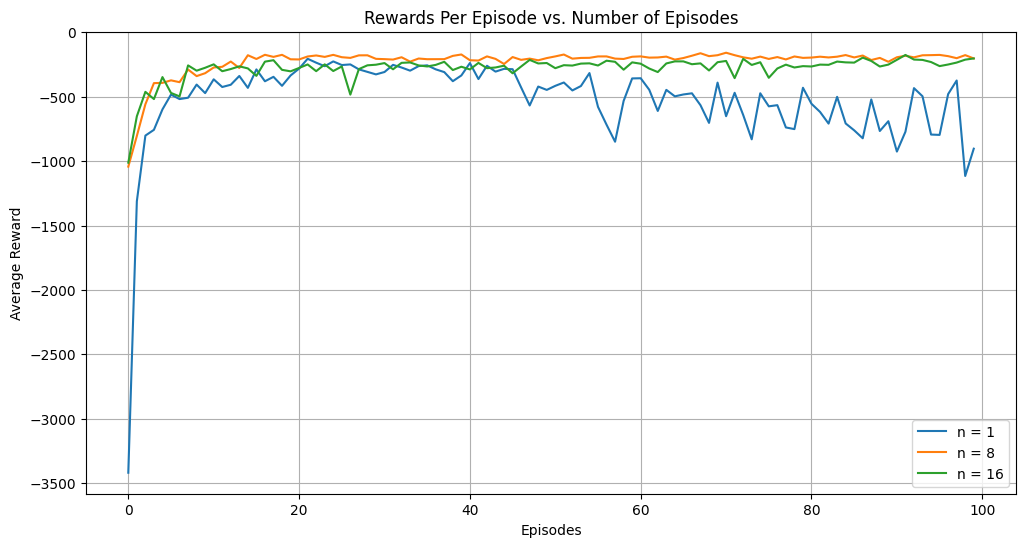

In [8]:
import gym
import numpy as np
import matplotlib.pyplot as plt


class EpisodicNStepSARSA:
    def __init__(self, env, num_basis=8, learning_rate=0.01, gamma=1.0, epsilon=0.1, n=4):
        self.env = env
        self.num_basis = num_basis
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon
        self.n = n

        self.num_actions = env.action_space.n
        self.weights = np.zeros(((self.num_basis + 1) * 2, self.num_actions))

    def bound(self, s, min_val, max_val):
        return (s - min_val) / (max_val - min_val)

    def generate_Fourier_features(self, s, n):
        coefficients = np.arange(n + 1)
        return np.cos(coefficients * np.pi * s)

    def get_features(self, state):
        position, velocity = state
        bounded_position = self.bound(position, -1.2, 0.6)
        bounded_velocity = self.bound(velocity, -0.07, 0.07)

        position_features = self.generate_Fourier_features(
            bounded_position, self.num_basis)
        velocity_features = self.generate_Fourier_features(
            bounded_velocity, self.num_basis)

        return np.concatenate([position_features, velocity_features])

    def get_q_value(self, state, action):
        features = self.get_features(state)
        return np.dot(self.weights[:, action], features)

    def get_action(self, state):
        if np.random.random() < self.epsilon:
            return self.env.action_space.sample()
        else:
            q_values = [self.get_q_value(state, a)
                        for a in range(self.num_actions)]
            return np.argmax(q_values)

    def update(self, trajectory, T, t):
        tau = t - self.n + 1
        if tau >= 0:
            G = 0
            for i in range(tau + 1, min(tau + self.n + 1, T + 1)):
                G += (self.gamma ** (i - tau - 1)) * trajectory[i][2]
            if tau + self.n < T:
                G += (self.gamma ** self.n) * self.get_q_value(
                    trajectory[tau + self.n][0], trajectory[tau + self.n][1]
                )

            state, action = trajectory[tau][:2]
            features = self.get_features(state)
            td_error = G - self.get_q_value(state, action)
            self.weights[:, action] += self.learning_rate * td_error * features

    def train(self, num_episodes, max_steps=1000):
        episode_steps = []
        reward_per_episode = []

        for episode in range(num_episodes):
            state, _ = self.env.reset()
            action = self.get_action(state)
            trajectory = [(state, action, 0)]
            t, T = 0, float("inf")
            total_reward = 0

            while True:
                if t < T:
                    next_state, reward, done, _, _ = self.env.step(action)
                    total_reward += reward
                    next_action = self.get_action(
                        next_state) if not done else None
                    trajectory.append((next_state, next_action, reward))
                    if done:
                        T = t + 1
                    state, action = next_state, next_action

                self.update(trajectory, T, t)
                t += 1
                if tau := t - self.n >= T - 1:
                    break

            episode_steps.append(t)
            reward_per_episode.append(total_reward)

            # Log every 10 episodes
            if (episode + 1) % 10 == 0:
                print(
                    f"Episode {episode + 1}: Steps = {t}, Total Reward = {total_reward}")

        return episode_steps, reward_per_episode


def average_runs(env_name, num_runs, num_episodes, params):
    avg_steps = np.zeros(num_episodes)
    avg_rewards = np.zeros(num_episodes)

    for run in range(num_runs):
        print(f"Run {run + 1}/{num_runs}...")
        env = gym.make(env_name)
        agent = EpisodicNStepSARSA(env, **params)
        episode_steps, reward_per_episode = agent.train(num_episodes)
        avg_steps += np.array(episode_steps)
        avg_rewards += np.array(reward_per_episode)

    avg_steps /= num_runs
    avg_rewards /= num_runs

    return avg_steps, avg_rewards


def plot_steps_per_episode(n_values, avg_steps_per_n, num_episodes):
    plt.figure(figsize=(12, 6))
    for n, avg_steps in zip(n_values, avg_steps_per_n):
        plt.plot(range(num_episodes), np.log(avg_steps), label=f'n = {n}')
    plt.title("Steps Per Episode (Log Scale) vs. Number of Episodes")
    plt.xlabel("Episodes")
    plt.ylabel("Log(Steps)")
    plt.legend()
    plt.grid()
    plt.show()


def plot_rewards_per_episode(n_values, avg_rewards_per_n, num_episodes):
    plt.figure(figsize=(12, 6))
    for n, avg_rewards in zip(n_values, avg_rewards_per_n):
        plt.plot(range(num_episodes), avg_rewards, label=f'n = {n}')
    plt.title("Rewards Per Episode vs. Number of Episodes")
    plt.xlabel("Episodes")
    plt.ylabel("Average Reward")
    plt.legend()
    plt.grid()
    plt.show()


# Main Script
if __name__ == "__main__":
    ENV_NAME = 'MountainCar-v0'
    NUM_RUNS = 10  # Reduce for testing; increase to 50 for final runs
    NUM_EPISODES = 100
    N_VALUES = [1, 8, 16]
    PARAMS = {
        'num_basis': 8,
        'learning_rate': 0.01,
        'gamma': 1.0,
        'epsilon': 0.1
    }

    avg_steps_per_n = []
    avg_rewards_per_n = []

    for n in N_VALUES:
        print(f"Running for n = {n}...")
        params = PARAMS.copy()
        params['n'] = n
        avg_steps, avg_rewards = average_runs(
            ENV_NAME, NUM_RUNS, NUM_EPISODES, params)
        avg_steps_per_n.append(avg_steps)
        avg_rewards_per_n.append(avg_rewards)

    # Plot the results
    plot_steps_per_episode(N_VALUES, avg_steps_per_n, NUM_EPISODES)
    plot_rewards_per_episode(N_VALUES, avg_rewards_per_n, NUM_EPISODES)


(d) Which value of $n$ results in faster learning? Why?

>Answer 